# **1 - Veri Setinin Hazırlanması**

In [1]:
# Veri işleme ve analiz için kütüphaneler
import pandas as pd
import numpy as np

# Görselleştirme için kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri setini dahil etmek
df_ = pd.read_csv('/kaggle/input/red-wine-quality-prediction/winequality-red.csv')
#verilerinizi kaybetme riskini azaltır.
df = df_.copy()

****

In [3]:
import random


# Fonksiyon tanımı
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: int = 42) -> pd.DataFrame:
    df_with_missing = dataframe.copy()

    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    if seed is not None:  
        random.seed(seed)

    # Rastgele eksik değerler ekleme
    for _ in range(num_missing):
        row_index = random.randint(0, dataframe.shape[0] - 1)
        col_index = random.randint(0, dataframe.shape[1] - 1)
        df_with_missing.iat[row_index, col_index] = np.nan

    return df_with_missing  # Döngü tamamlandıktan sonra return yapılmalı

# Fonksiyon çağrısı
df = add_random_missing_values(dataframe=df, missing_rate=0.03)


# **2-Veriye İlk Bakış**

In [4]:
#Veri setinin ilk ve son 5 gözlemi
print("İlk 5:")
print(df.head(n=5))

# Son 5 satırı yazdır
print("\nSon 5:")
print(df.tail(n=5))

İlk 5:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20        NaN   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8   

In [5]:
df.shape

(1599, 12)

In [6]:
print(list(df.columns),'\n')
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon var \n")
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

Veri seti içerisinde toplam 12 kolon var 

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1555 non-null   float64
 1   volatile acidity      1546 non-null   float64
 2   citric acid           1559 non-null   float64
 3   residual sugar        1539 non-null   float64
 4   chlorides             1542 non-null   float64
 5   free sulfur dioxide   1558 non-null   float64
 6   total sulfur dioxide  1547 non-null   float64
 7   density               1549 non-null   float64
 8   pH                    1557 non-null   float64
 9   sulphates             1547 non-null   float64
 10  alcohol               1560 non-null   float64
 11  quality               1559 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [9]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

Kod, döngü tamamlandıktan sonra iki liste oluşturmuş olur:
categorical_features: Kategorik özellikleri (sütunları) içeren liste.
numerical_features: Sayısal özellikleri (sütunları) içeren liste.
Bu kod, pandas DataFrame'inin her sütununun veri türüne göre kategorik ve sayısal özellikleri ayırır. Bu işlem, özellikle veri ön işleme adımlarında (özellikle makine öğrenmesi projelerinde) önemli olabilir çünkü kategorik ve sayısal veriler farklı şekilde işlenir.

In [10]:
categorical_features, numerical_features

([],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [11]:
df['alcohol'][:3]

0    9.4
1    9.8
2    9.8
Name: alcohol, dtype: float64


**Bir pandas DataFrame'indeki sayısal sütunlar için özet istatistikler hesaplar.Bu özet istatistikler şunları içerir:count: Verinin sayısı (null olmayan değerlerin sayısı)mean: Ortalamastd: Standart sapmamin: Minimum değer25%: 1. çeyrek (yüzdelik dilim)50%: Medyan (2. çeyrek)75%: 3. çeyrekmax: Maksimum değerBu özet istatistikler, her sayısal sütun için ayrı ayrı hesaplanır.**


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1555.0,8.320000,1.748651,4.60000,7.1000,7.90000,9.20000,15.90000
volatile acidity,1546.0,0.528386,0.179297,0.12000,0.3900,0.52000,0.64000,1.58000
citric acid,1559.0,0.272123,0.194652,0.00000,0.0900,0.26000,0.42500,1.00000
residual sugar,1539.0,2.546101,1.424622,0.90000,1.9000,2.20000,2.60000,15.50000
chlorides,1542.0,0.087359,0.046878,0.01200,0.0700,0.07900,0.09000,0.61100
free sulfur dioxide,1558.0,15.893132,10.514111,1.00000,7.0000,14.00000,21.75000,72.00000
total sulfur dioxide,1547.0,46.601810,33.040336,6.00000,22.0000,38.00000,62.50000,289.00000
density,1549.0,0.996763,0.001879,0.99007,0.9956,0.99675,0.99786,1.00369
pH,1557.0,3.310771,0.154990,2.74000,3.2100,3.31000,3.40000,4.01000
sulphates,1547.0,0.656587,0.165265,0.33000,0.5500,0.62000,0.73000,1.98000


# **3-Eksik Veri Analizi**

**Eksik Olan**

In [13]:
df.isna().sum()

fixed acidity           44
volatile acidity        53
citric acid             40
residual sugar          60
chlorides               57
free sulfur dioxide     41
total sulfur dioxide    52
density                 50
pH                      42
sulphates               52
alcohol                 39
quality                 40
dtype: int64

In [14]:
df.isna().sum().sum()

570

**Eksik Olmayan**

In [15]:
df.notnull().sum()

fixed acidity           1555
volatile acidity        1546
citric acid             1559
residual sugar          1539
chlorides               1542
free sulfur dioxide     1558
total sulfur dioxide    1547
density                 1549
pH                      1557
sulphates               1547
alcohol                 1560
quality                 1559
dtype: int64

In [16]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 18618 adet eksik olmayan, 570 eksik gözlem var.


**Veri setinde en az bir gözlemi eksik olan kayıtlar**

In [17]:
df[df.isnull().any(axis = 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,NaN,9.8,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,NaN
7,7.3,0.650,0.00,1.2,0.065,NaN,21.0,0.99460,3.39,0.47,10.0,7.0
11,7.5,NaN,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0
12,5.6,0.615,0.00,1.6,0.089,NaN,59.0,0.99430,3.58,0.52,9.9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,NaN,13.0,27.0,0.99362,3.57,0.50,11.9,5.0
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,NaN,3.34,0.85,11.4,6.0
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,NaN,0.78,12.8,6.0
1592,6.3,0.510,NaN,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


**Hiç eksik gözlemi bulunmayan kayıtlar**

In [18]:
df[df.notnull().all(axis = 1)][:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5.0
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5.0
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5.0



**Aşağıda grafikte görülen öğeler:Çubuklar: Her bir çubuk, DataFrame'deki bir sütunu temsil eder ve çubuğun yüksekliği, o sütundaki eksik verilerin oranına göre belirlenir.Boş alan: Çubuğun boş kısmı, eksik (NaN) olan değerlerin oranını temsil eder.Dolu alan: Çubuğun dolu kısmı, o sütunda eksik olmayan (geçerli) verilerin oranını gösterir.**


In [19]:
!pip install missingno

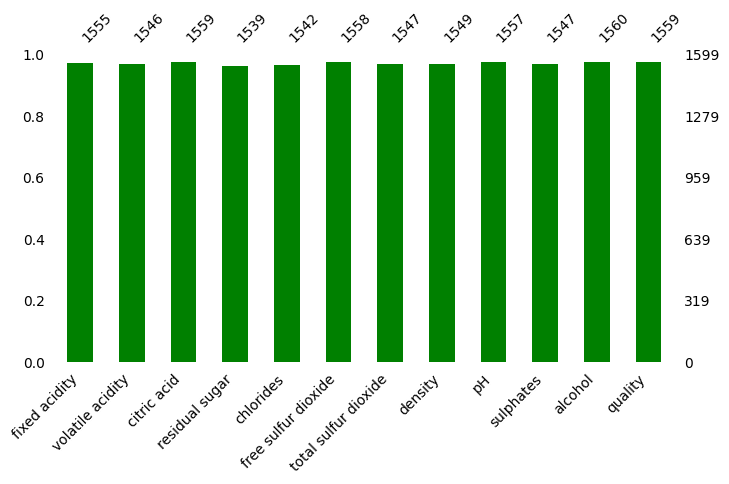

In [20]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10,
        color = 'green');


**msno.matrix(df) fonksiyonu, eksik verileri görsel olarak bir matris şeklinde gösterir.Eksik veriler genellikle beyaz renkle, geçerli veriler ise renkli (gri gibi) tonlarla gösterilir.**


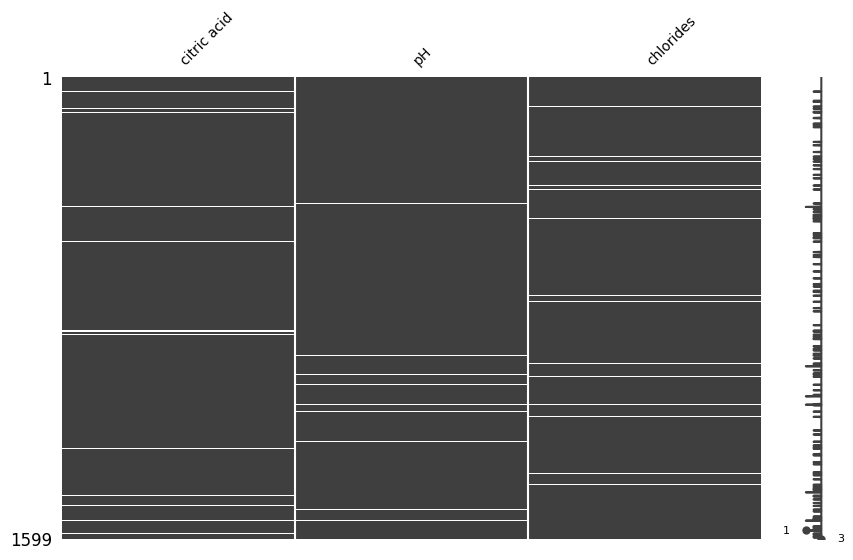

In [21]:
msno.matrix(df = df[['citric acid', 'pH','chlorides']],
            figsize = (10, 6),
            fontsize = 10);


**msno.heatmap() fonksiyonu, eksik verilerin birbirleriyle olan korelasyonunu görsel olarak gösteren bir ısı haritası oluşturur.0.1 değeri, iki sütun arasındaki eksik verilerin zayıf bir ilişkiye sahip olduğunu (yani, bir sütunda eksik veri varsa, diğer sütunda eksik veri olma olasılığının düşük olduğunu) gösterir.**


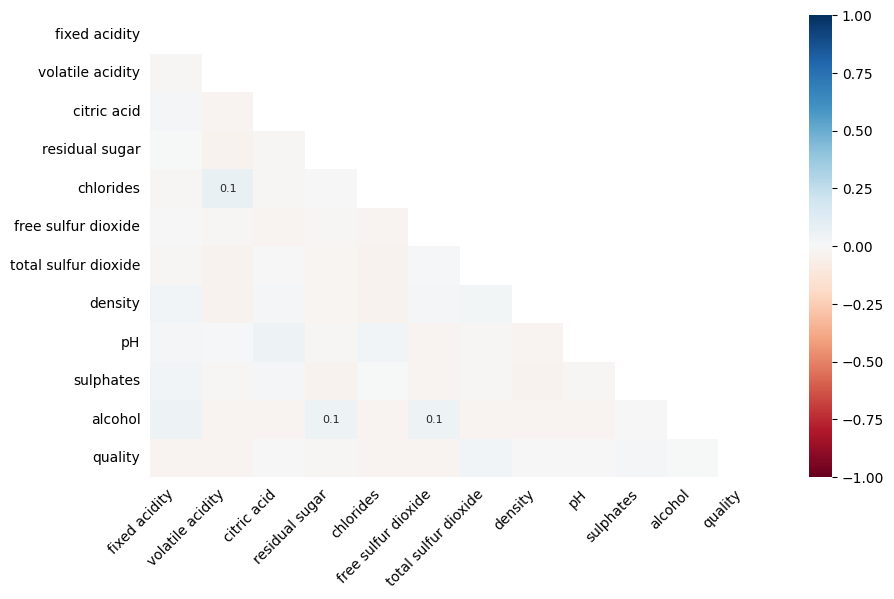

In [22]:
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

In [23]:
# Eksik verilerin sayısını gösterir
missing_data_count = df.isnull().sum()
print("Eksik Verilerin Sayısı:")
print(missing_data_count)

# Eksik verilerin yüzdesini gösterir
missing_data_percentage = (df.isnull().mean() * 100)
print("Eksik Verilerin Yüzdesi:")
print(missing_data_percentage)


Eksik Verilerin Sayısı:
fixed acidity           44
volatile acidity        53
citric acid             40
residual sugar          60
chlorides               57
free sulfur dioxide     41
total sulfur dioxide    52
density                 50
pH                      42
sulphates               52
alcohol                 39
quality                 40
dtype: int64
Eksik Verilerin Yüzdesi:
fixed acidity           2.751720
volatile acidity        3.314572
citric acid             2.501563
residual sugar          3.752345
chlorides               3.564728
free sulfur dioxide     2.564103
total sulfur dioxide    3.252033
density                 3.126954
pH                      2.626642
sulphates               3.252033
alcohol                 2.439024
quality                 2.501563
dtype: float64


**Her sütundaki eksik verilerin oranı %5'ten az. Bu durumda, eksik verileri silebiliriz**. 

In [24]:
df.dropna(inplace = False)[:9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5.0
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5.0


# **4-Kategorik Değişken Analizi**

In [25]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
df_numerical = df.select_dtypes(include = "float64")
df_numerical.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [27]:
df_numerical["alcohol"].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [28]:
for col in df_numerical.columns:
    print(f'There are {df_numerical[col].nunique()} unique values in "{col}" numerical feature.\n')

There are 96 unique values in "fixed acidity" numerical feature.

There are 143 unique values in "volatile acidity" numerical feature.

There are 80 unique values in "citric acid" numerical feature.

There are 91 unique values in "residual sugar" numerical feature.

There are 153 unique values in "chlorides" numerical feature.

There are 60 unique values in "free sulfur dioxide" numerical feature.

There are 144 unique values in "total sulfur dioxide" numerical feature.

There are 436 unique values in "density" numerical feature.

There are 89 unique values in "pH" numerical feature.

There are 96 unique values in "sulphates" numerical feature.

There are 65 unique values in "alcohol" numerical feature.



In [29]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_numerical.columns:
    print(f'{df_numerical[col].value_counts()}\n', 5*"*********")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
 *********************************************
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
 *********************************************
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
 *********************************************
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
 *********************************************
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
   

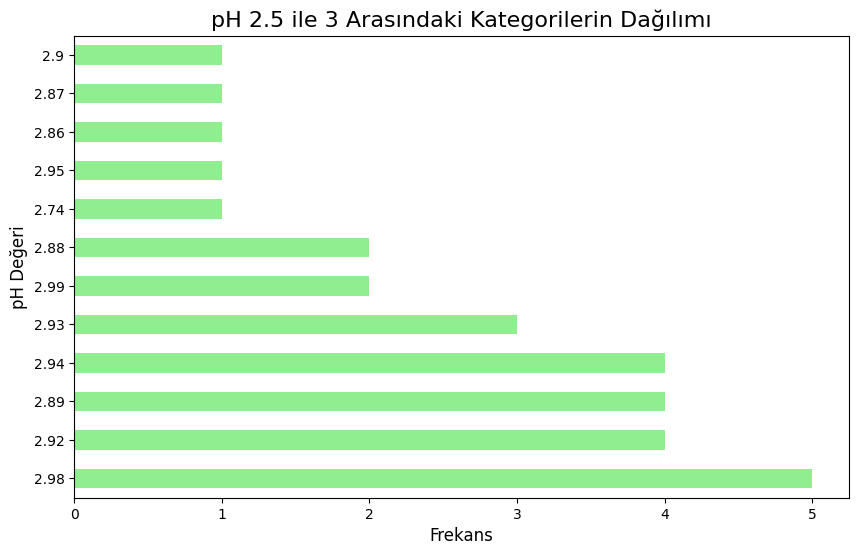

In [30]:
# pH değeri 2.5 ile 3 arasında olan değerleri seçelim
filtered_df = df[(df['pH'] >= 2.5) & (df['pH'] < 3)]

# Bu aralıkta pH kategorilerinin gözlem sayılarını alalım
pH_counts_filtered = filtered_df['pH'].value_counts()

# Belirli pH aralığına göre bar grafiği
plt.figure(figsize=(10,6))
pH_counts_filtered.plot.barh(color='lightgreen')
plt.title('pH 2.5 ile 3 Arasındaki Kategorilerin Dağılımı', fontsize=16)
plt.xlabel('Frekans', fontsize=12)
plt.ylabel('pH Değeri', fontsize=12)
plt.show()


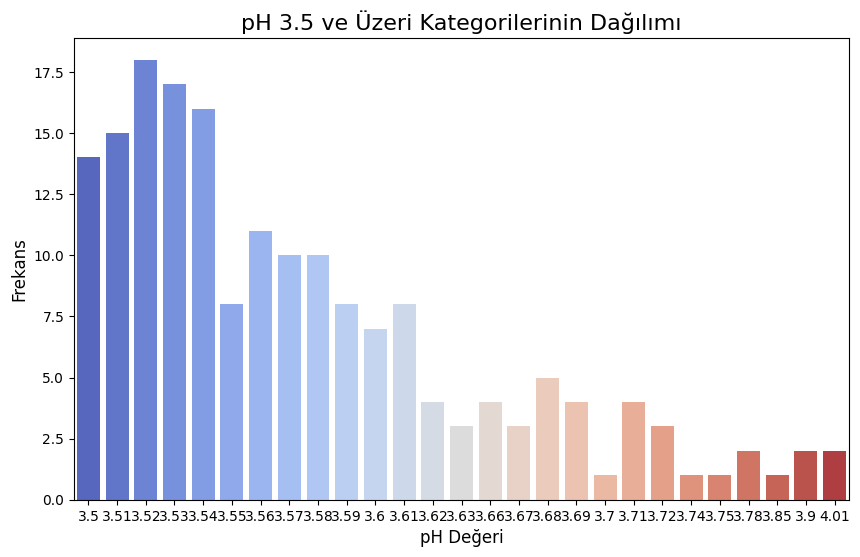

In [31]:
# pH değeri 3.5 ve üzeri olanları filtreleyelim
filtered_df = df[df['pH'] >= 3.5]

# Seaborn ile bu filtrelenmiş pH değerlerinin gözlem sayılarını görselleştirelim
plt.figure(figsize=(10,6))
sns.countplot(x='pH', data=filtered_df, palette='coolwarm')
plt.title('pH 3.5 ve Üzeri Kategorilerinin Dağılımı', fontsize=16)
plt.xlabel('pH Değeri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.show()

**Aşağıdaki kod, her quality kategorisi için pH değerlerinin ortalamasını ve maksimum değerini verir.**

In [32]:
# 'quality' kategorisine göre gruplama yapalım ve her grup için pH ortalamasını ve maksimum değerini hesaplayalım
grouped_stats = df.groupby('quality')['pH'].agg(['mean', 'max'])

# Sonuçları görüntüleyelim
print(grouped_stats)

             mean   max
quality                
3        3.398000  3.63
4        3.381509  3.90
5        3.304949  3.74
6        3.318072  4.01
7        3.290754  3.78
8        3.267222  3.72


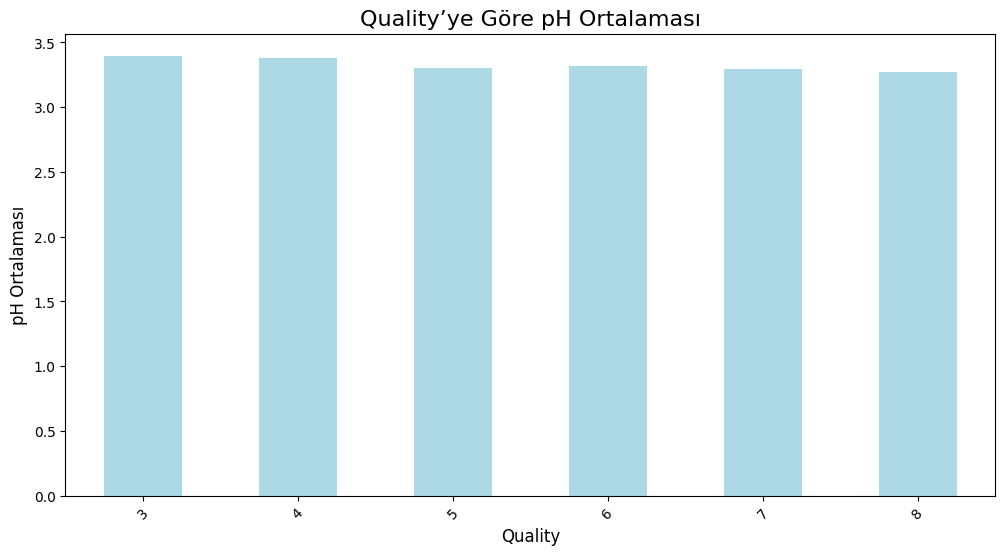

In [33]:
# 'quality' kategorisine göre gruplama yapalım ve pH ortalamasını hesaplayalım
grouped_df = df.groupby('quality')['pH'].mean()

# Bar grafiği ile görselleştirelim
plt.figure(figsize=(12,6))
grouped_df.plot.bar(color='lightblue')
plt.title('Quality’ye Göre pH Ortalaması', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('pH Ortalaması', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# **5-Sürekli Değişken Analizi**

In [34]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [36]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [37]:
give_stats(dataframe = df)

**********fixed acidity**********
Mean value of fixed acidity is 8.32
Std value of fixed acidity is 1.74
Max value of fixed acidity is 15.9
Min value of fixed acidity is 4.6
Count value of fixed acidity is 1599
Median value of fixed acidity is 7.9

**********volatile acidity**********
Mean value of volatile acidity is 0.53
Std value of volatile acidity is 0.18
Max value of volatile acidity is 1.58
Min value of volatile acidity is 0.12
Count value of volatile acidity is 1599
Median value of volatile acidity is 0.52

**********citric acid**********
Mean value of citric acid is 0.27
Std value of citric acid is 0.19
Max value of citric acid is 1.0
Min value of citric acid is 0.0
Count value of citric acid is 1599
Median value of citric acid is 0.26

**********residual sugar**********
Mean value of residual sugar is 2.54
Std value of residual sugar is 1.41
Max value of residual sugar is 15.5
Min value of residual sugar is 0.9
Count value of residual sugar is 1599
Median value of residual su

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

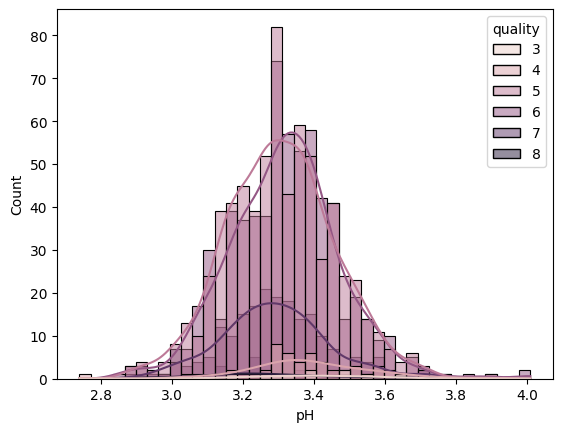

In [38]:
sns.histplot(data = df, x = "pH", kde = True, hue = "quality");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


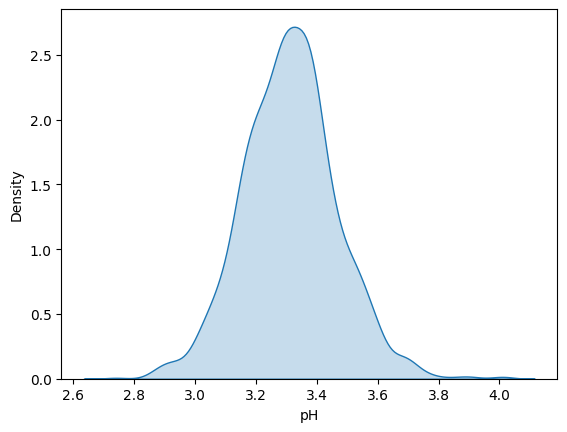

In [39]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['pH'], fill = True);

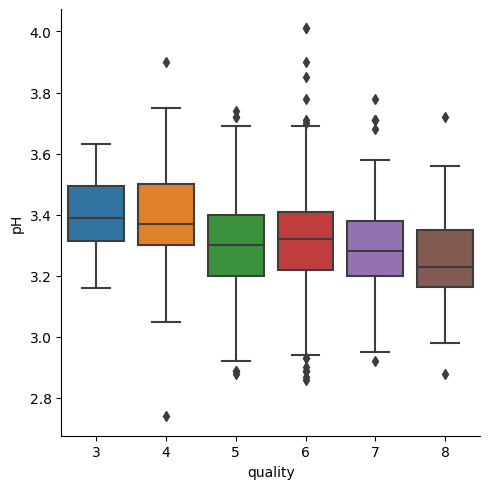

In [40]:
sns.catplot(data=df, x="quality", y="pH", kind="box")